# ESTADÍSTICA INFERENCIAL

Clase 13/07/2023

**Llegar a conclusiones sobre una población o una muestra a partir de hechos fácticos (datos, medidas, eventos) utilizando métodos estadísticos y considerando la incertidumbre inherente a dichas conclusiones**

Realizar un análisis predictivo a partir de un conjunto de datos.

Realizar una caracterización partiendo de datos, buscando correlaciones, determinando las medidas de tendencia central(Media, mediana y error estándar de la media). 

**Es fundamental en la toma de desiciones basadas en datos**

### Error Estándar de la media (SEM Standard Error of the Mean)

Medida de la precisión de la estimación de la altura media de la población basada en la muestra

$$ \sigma_ {\bar x}  = \frac {\sigma}{\sqrt{n}} $$


La media y la desviación estándar siempre tienen las mismas unidades



### Tamaño de la muestra

Es importante considerar varios criterios para obtener resultados confiables y representativos de la población. Los resultados obtenidos dependen del tamaño de la muestra.

Criterios:
1. **Nivel de confianza deseado:** Cuando mayor sea el nivel de confianza deseado, mayor deberá ser el tamaño de la muestra.
2. **Tamaño de la población:** Si la población es pequeña, se requerirá un tamaño de muestra relativamente mayor para obtener resultados confiables.
3. **Variabilidad en los datos:** Si los datos de la población presentan una alta variabilidad (alta dispersión de los datos), se necesitará un tamaño de muestra más grande
4. **Tamaño de efecto:** Si se espera que las diferencias o efectos a estimar sean pequeños, puede ser necesario un tamaño de muestra más grande para detectar esas diferencias de manera confiable.
5. **Recursos disponibles:** Tiempo, presupuesto y personal, un tamaño de muestra más grande requerirá más recursos.

*Ejemplo:* Estaturas de estudiantes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

media: -0.0008518, 
Desviavión estándar: 0.9994104934035059


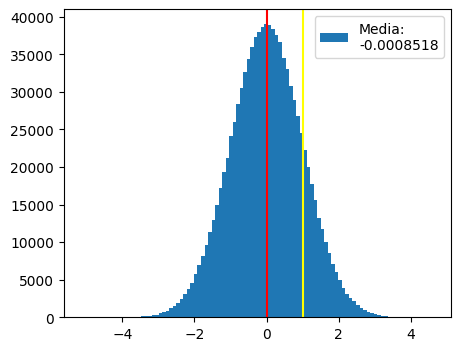

In [2]:
# Distribución normal o Gaussiana estándar: Promedio= 0 y desviación estándar = 1
N = 10**6
z = np.random.randn(N) # Generación de números aleatorios con distribución normal estándar 
μ = z.mean().round(7)
σ = z.std()
print(f'media: {μ}, \nDesviavión estándar: {σ}')

plt.figure(figsize= (5,4))
plt.hist(z, bins= 100, label= f'Media:\n{μ}')
plt.axvline(μ, color ='red')
plt.axvline(μ + σ, color ='yellow')
plt.legend()
plt.show()

Considero estudiantes con $ \mu = 170 $ y $\sigma = 5 $ 

media: 170.00081 
Desviavión estándar: 4.9997421277401894


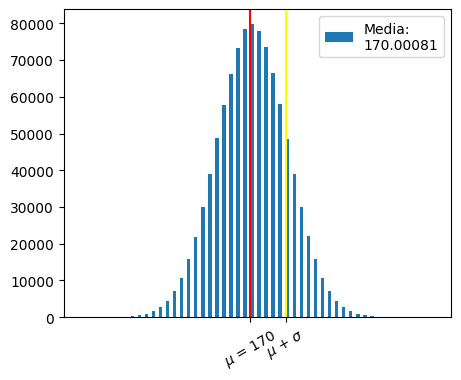

In [3]:
N = 10**6
np.random.seed(100)
# Genera números con distribución normal de media 170 y desviación estándar 5
z = (5*np.random.randn(N) + 170).round(0) 
μ = z.mean().round(7)
σ = z.std()
print(f'media: {μ} \nDesviavión estándar: {σ}')

plt.figure(figsize= (5,4))
plt.hist(z, bins= 100, label= f'Media:\n{μ}')
plt.axvline(μ, color ='red')
plt.axvline(μ + σ, color ='yellow')
plt.xticks([170, 175], ['$\mu$ = 170', '$\mu$ + $\sigma$'], rotation= 30)
plt.legend()
plt.show()

In [4]:
z.min()

146.0

In [5]:
z.max()

196.0

In [6]:
# Selecciono una muestra de z
sample = np.random.choice(z, 3) 
print(sample, '\nMedia:',sample.mean().round(2))

[171. 171. 177.] 
Media: 173.0


Error estándar de la media

$$ \sigma_{ \bar x} = \frac {\sigma}{\sqrt{n}} $$

In [7]:
n = 100
sample = np.random.choice(z, n) 
media = sample.mean()
desv = sample.std()
ErrMedia = (sample.std() / np.sqrt(n)).round(2)
#print(f'muestra {sample}')
print(f'Estatura promedio: {sample.mean().round(2)}')
print(f'Desviación estándar: {sample.std().round(2)}')
print(f'Error estándar de la media: {ErrMedia}')
print(f'Rango estimado para la media ({(media - ErrMedia).round(2)},{(media + ErrMedia).round(2)})')
print(f'Media de la población = {z.mean().round(1)}')

Estatura promedio: 169.98
Desviación estándar: 5.22
Error estándar de la media: 0.52
Rango estimado para la media (169.46,170.5)
Media de la población = 170.0


In [8]:
def muestreo(n):
    sample = np.random.choice(z, n) 
    media = sample.mean().round(2)
    desv = sample.std().round(2)
    ErrMedia = (sample.std() / np.sqrt(n)).round(2)
    return media, desv, ErrMedia

In [9]:
muestreo(5)

(169.8, 4.58, 2.05)

Simulación 1

In [10]:
iteraciones = 10**5

medias = []
desviaciones = []
errores = []

for _ in range(iteraciones):
    a, b, c = muestreo(5)
    medias.append(a)
    desviaciones.append(b)
    errores.append(c)

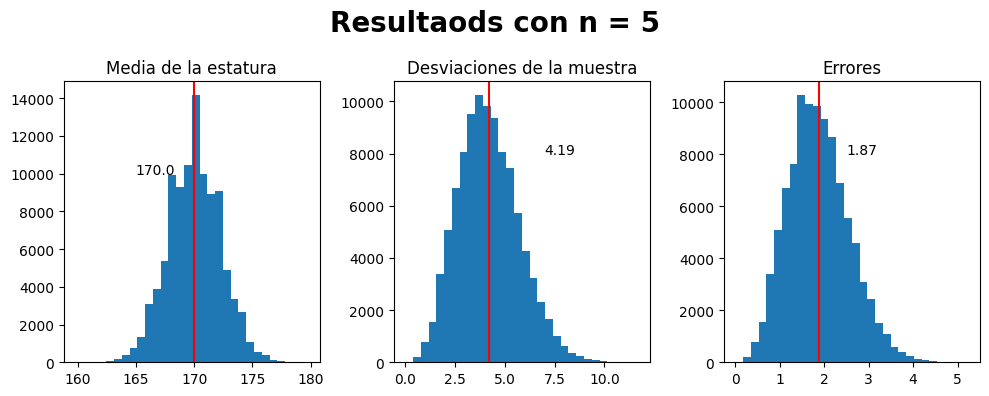

In [11]:
medias  = np.array(medias)
desviaciones = np.array(desviaciones)
errores = np.array(errores)

fig = plt.figure(figsize= (10, 4))
plt.suptitle('Resultaods con n = 5', weight= 'bold', size = 20)

plt.subplot(1, 3, 1)
plt.title('Media de la estatura')
plt.hist(medias, bins= 30)
plt.axvline(medias.mean(), color= 'red')
plt.text(165, 10000, medias.mean().round(2))

plt.subplot(1, 3, 2)
plt.title('Desviaciones de la muestra')
plt.hist(desviaciones, bins= 30)
plt.axvline(desviaciones.mean(), color= 'red')
plt.text(7, 8000, desviaciones.mean().round(2))

plt.subplot(1, 3, 3)
plt.title('Errores')
plt.hist(errores, bins= 30)
plt.axvline(errores.mean(), color= 'red')
plt.text(2.5, 8000, errores.mean().round(2))

fig.tight_layout() # Ajusta el ancho de las gráficas
plt.show()

Simulación 2

In [12]:
iteraciones = 10**5

medias = []
desviaciones = []
errores = []

for _ in range(iteraciones):
    a, b, c = muestreo(100)
    medias.append(a)
    desviaciones.append(b)
    errores.append(c)

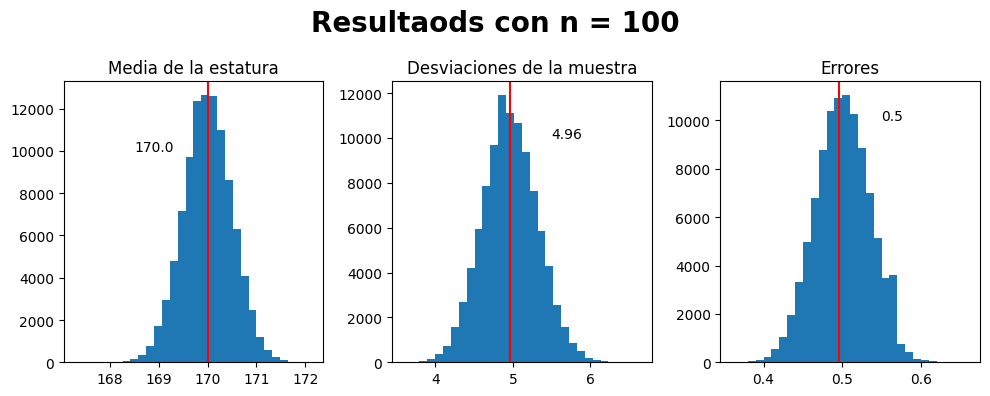

In [13]:
medias  = np.array(medias)
desviaciones = np.array(desviaciones)
errores = np.array(errores)

fig = plt.figure(figsize= (10, 4))
plt.suptitle('Resultaods con n = 100', weight= 'bold', size = 20)

plt.subplot(1, 3, 1)
plt.title('Media de la estatura')
plt.hist(medias, bins= 30)
plt.axvline(medias.mean(), color= 'red')
plt.text(168.5, 10000, medias.mean().round(2))

plt.subplot(1, 3, 2)
plt.title('Desviaciones de la muestra')
plt.hist(desviaciones, bins= 30)
plt.axvline(desviaciones.mean(), color= 'red')
plt.text(5.5, 10000, desviaciones.mean().round(2))

plt.subplot(1, 3, 3)
plt.title('Errores')
plt.hist(errores, bins= 30)
plt.axvline(errores.mean(), color= 'red')
plt.text(0.55, 10000, errores.mean().round(2))

fig.tight_layout() # Ajusta el ancho de las gráficas
plt.show()